<a href="https://colab.research.google.com/github/MaInthiyaz/Codtech/blob/main/Predictive_Analysis_Using_Machine_Learning_TASK2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Build a machine learning model (regression or classification) using a dataset.

Deliver a notebook showing:

Feature selection

Model training

Model evaluation

 the dataset name: data_reports_monthly.csv.



In [3]:
 # Predictive Analysis (Regression Example)
 # Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load your dataset
df = pd.read_csv("data_reports_monthly.csv")

# Step 3: Preview data
print(df.head())
print(df.info())

  Month/Year      License Class Trips Per Day Farebox Per Day Unique Drivers  \
0    2025-03  FHV - High Volume       662,479               -         80,637   
1    2025-03              Green         1,625          34,960            653   
2    2025-03             Yellow       132,152       3,091,726         12,663   
3    2025-02    FHV - Black Car        26,517               -          9,926   
4    2025-02  FHV - High Volume       690,694               -         80,286   

  Unique Vehicles Vehicles Per Day  Avg Days Vehicles on Road  \
0          79,950           57,956                       22.5   
1             626              359                       17.8   
2           9,504            8,452                       27.6   
3           9,768            4,477                       12.8   
4          79,556           57,477                       20.2   

   Avg Hours Per Day Per Vehicle  Avg Days Drivers on Road  \
0                            6.4                      22.6   
1   

In [7]:
# Step 4: Clean data (convert strings to numbers, handle missing values)
df = df.replace(',', '', regex=True)
df = df.apply(pd.to_numeric, errors='ignore')

<ipython-input-7-d4a467a46da9>:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(pd.to_numeric, errors='ignore')


In [8]:
# Example: Convert 'Trips Per Day' to numeric
df['Trips Per Day'] = pd.to_numeric(df['Trips Per Day'], errors='coerce')
df.dropna(inplace=True)  # Drop rows with missing values

In [9]:
# Step 5: Select features (X) and target (y)
X = df[['Unique Vehicles', 'Avg Hours Per Day Per Vehicle']]
y = df['Trips Per Day']

In [10]:
# Step 6: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Predict
y_pred = model.predict(X_test)

In [11]:
# Step 9: Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R² Score: 0.607765221621098
MSE: 6723.155131672544


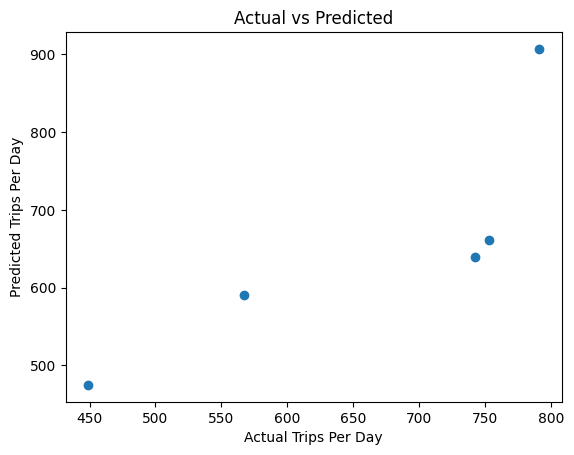

In [12]:
# Step 10: Plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Trips Per Day")
plt.ylabel("Predicted Trips Per Day")
plt.title("Actual vs Predicted")
plt.show()